<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Toronto City, Canada</font></h1>


## Introduction



Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy --yes 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes 

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>


## 1. Scrape Toronto Dataset from Wiki and Load Into Dataframe


In [4]:
#conda install -c conda-forge wikipedia

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Users\acer\Anaconda3

  added / updated specs:
    - wikipedia


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wikipedia-1.4.0            |             py_2          13 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          13 KB

The following NEW packages will be INSTALLED:

  wikipedia          conda-forge/noarch::wikipedia-1.4.0-py_2




wikipedia-1.4.0      | 13 KB     |            |   0% 
wikipedia-1.4.0      | 13 KB     | ########## | 100% 
wikipedia-1.4.0      | 13 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


#### Load and explore the data

In [2]:
import wikipedia as wp

In [4]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html, header = 0)[0]
df.head()

Postal Code           Borough              Neighbourhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

#### Remove codes without assigned Boroughs

In [5]:
df_PostalCodes = df[df['Borough']!="Not assigned"]
df_PostalCodes.reset_index(inplace=True, drop=True)
df_PostalCodes.head()

Postal Code           Borough                                Neighbourhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

In [6]:
df_PostalCodes

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood  
0                                            Parkwoods  
1                                     Vic

For the analysis, we are including only those neighbourhoods with boroughs assigned to them. We note that within each borough there are multiple postal codes and neighbourhoods


In [7]:
df_PostalCodes.shape

(103, 3)

## 2. Obtain the coordinates of each neighbourhood

In [8]:
df_Coordinates=pd.read_csv('http://cocl.us/Geospatial_data')
df_Coordinates

Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.782736 -79.442259
25          M3A  43.753259 -79.329656
26          M3B  43.745906 -79.352188
27          M3C  43.725900 -79.340923
28          M3H  43.754328 -79.442259
29          M3J  43.767980 -79.487262
30          M3K  43.737473 -79.464763
31          M3L  43.739015 -79.506944
32          M3M  43.728496 -79.495697
33          M3N  43.761631 -79.520999
34          M4A  43.725882 -79.315572
35          M4B  43.706397 -79.309937
36          M4C  43.695344 -79.318389
37          M4E  43.676357 -79.293031
38          M4G  43.709060 -79.363452
39          M4H  43.705369 -79.349372
40          M4J  43.685347 -79.338106
41          M4K  43.679557 -79.352188
42          M4L  43.668999 -79.315572
43          M4M  43.659526 -79.340923
44          M4N  43.728020 -79.388790
45          M4P  43.712751 -79.390197
46          M4R  43.715383 -79.405678
47          M4S  43.704324 -79.388790
48          M4T  43.689574 -79.383160
49          M4V  43.686412 -79.400049
50          M4W  43.679563 -79.377529
51          M4X  43.667967 -79.367675
52          M4Y  43.665860 -79.383160
53          M5A  43.654260 -79.360636
54          M5B  43.657162 -79.378937
55          M5C  43.651494 -79.375418
56          M5E  43.644771 -79.373306
57          M5G  43.657952 -79.387383
58          M5H  43.650571 -79.384568
59          M5J  43.640816 -79.381752
60          M5K  43.647177 -79.381576
61          M5L  43.648198 -79.379817
62          M5M  43.733283 -79.419750
63          M5N  43.711695 -79.416936
64          M5P  43.696948 -79.411307
65          M5R  43.672710 -79.405678
66          M5S  43.662696 -79.400049
67          M5T  43.653206 -79.400049
68          M5V  43.628947 -79.394420
69          M5W  43.646435 -79.374846
70          M5X  43.648429 -79.382280
71          M6A  43.718518 -79.464763
72          M6B  43.709577 -79.445073
73          M6C  43.693781 -79.428191
74          M6E  43.689026 -79.453512
75          M6G  43.669542 -79.422564
76          M6H  43.669005 -79.442259
77          M6J  43.647927 -79.419750
78          M6K  43.636847 -79.428191
79          M6L  43.713756 -79.490074
80          M6M  43.691116 -79.476013
81          M6N  43.673185 -79.487262
82          M6P  43.661608 -79.464763
83          M6R  43.648960 -79.456325
84          M6S  43.651571 -79.484450
85          M7A  43.662301 -79.389494
86          M7R  43.636966 -79.615819
87          M7Y  43.662744 -79.321558
88          M8V  43.605647 -79.501321
89          M8W  43.602414 -79.543484
90          M8X  43.653654 -79.506944
91          M8Y  43.636258 -79.498509
92          M8Z  43.628841 -79.520999
93          M9A  43.667856 -79.532242
94          M9B  43.650943 -79.554724
95          M9C  43.643515 -79.577201
96          M9L  43.756303 -79.565963
97          M9M  43.724766 -79.532242
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

#### Merge coordinates with the postal codes


In [9]:
df_Canada = pd.merge(df_PostalCodes, df_Coordinates, on='Postal Code')
df_Canada

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_Canada['Borough'].unique()),
        df_Canada.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


As some postal codes contain multiple neighbourhoods, we need to assign each neighbourhood to its own row

In [11]:
df_Canada = df_Canada.assign(Neighbourhood=df_Canada['Neighbourhood'].str.split(', ')).explode('Neighbourhood')

In [12]:
df_Canada

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
2           M5A  Downtown Toronto   
3           M6A        North York   
3           M6A        North York   
4           M7A  Downtown Toronto   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
5           M9A         Etobicoke   
6           M1B       Scarborough   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
8           M4B         East York   
9           M5B  Downtown Toronto   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
12          M1C       Scarborough   
12          M1C       Scarborough   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
18          M1E       Scarborough   
18          M1E       Scarborough   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
28          M3H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
33          M2J        North York   
33          M2J        North York   
34          M3J        North York   
34          M3J        North York   
35          M4J         East York   
35          M4J         East York   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
38          M1K       Scarborough   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
44          M1L       Scarborough   
44          M1L       Scarborough   
45          M2L        North York   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
49          M6L        North York   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
51          M1M       Scarborough   
51          M1M       Scarborough   
52          M2M        North York   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
55          M5M        North York   
56          M6M              York   
56          M6M              York   
56          M6M              York   
57          M9M        North York   
57      

In [13]:
df_Canada["Address"] = df_Canada["Neighbourhood"] +  ", Toronto City, ON, Canada"
df_Canada

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
2           M5A  Downtown Toronto   
3           M6A        North York   
3           M6A        North York   
4           M7A  Downtown Toronto   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
5           M9A         Etobicoke   
6           M1B       Scarborough   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
8           M4B         East York   
9           M5B  Downtown Toronto   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
12          M1C       Scarborough   
12          M1C       Scarborough   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
18          M1E       Scarborough   
18          M1E       Scarborough   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
28          M3H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
33          M2J        North York   
33          M2J        North York   
34          M3J        North York   
34          M3J        North York   
35          M4J         East York   
35          M4J         East York   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
38          M1K       Scarborough   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
44          M1L       Scarborough   
44          M1L       Scarborough   
45          M2L        North York   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
49          M6L        North York   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
51          M1M       Scarborough   
51          M1M       Scarborough   
52          M2M        North York   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
55          M5M        North York   
56          M6M              York   
56          M6M              York   
56          M6M              York   
57          M9M        North York   
57      

#### Use geopy library to update the coordintes of the neighbourhoods

In [14]:
geolocator = Nominatim(user_agent="toronto_explorer")

In [15]:
df_Canada["Coordinates"] = df_Canada["Address"].apply(geolocator.geocode)
df_Canada["Latitude"] = df_Canada["Coordinates"].apply(lambda x: x.latitude if x!= None else None)
df_Canada["Longitude"] = df_Canada["Coordinates"].apply(lambda x: x.longitude if x!= None else None)
df_Canada

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
2           M5A  Downtown Toronto   
3           M6A        North York   
3           M6A        North York   
4           M7A  Downtown Toronto   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
5           M9A         Etobicoke   
6           M1B       Scarborough   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
8           M4B         East York   
9           M5B  Downtown Toronto   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
12          M1C       Scarborough   
12          M1C       Scarborough   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
18          M1E       Scarborough   
18          M1E       Scarborough   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
28          M3H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
33          M2J        North York   
33          M2J        North York   
34          M3J        North York   
34          M3J        North York   
35          M4J         East York   
35          M4J         East York   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
38          M1K       Scarborough   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
44          M1L       Scarborough   
44          M1L       Scarborough   
45          M2L        North York   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
49          M6L        North York   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
51          M1M       Scarborough   
51          M1M       Scarborough   
52          M2M        North York   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
55          M5M        North York   
56          M6M              York   
56          M6M              York   
56          M6M              York   
57          M9M        North York   
57      

Remove data points that do not have any coordinates

In [16]:
df_Canada.dropna(inplace=True)
df_Canada.reset_index(inplace=True, drop=True)

In [17]:
df_Canada

Postal Code           Borough                    Neighbourhood   Latitude  \
0           M3A        North York                        Parkwoods  43.761124   
1           M4A        North York                 Victoria Village  43.732658   
2           M5A  Downtown Toronto                      Regent Park  43.660706   
3           M5A  Downtown Toronto                     Harbourfront  43.640080   
4           M6A        North York                   Lawrence Manor  43.722079   
5           M6A        North York                 Lawrence Heights  43.722778   
6           M7A  Downtown Toronto                     Queen's Park  43.659659   
7           M9A         Etobicoke                 Islington Avenue  43.621482   
8           M9A         Etobicoke            Humber Valley Village  43.666472   
9           M1B       Scarborough                          Malvern  43.809196   
10          M1B       Scarborough                            Rouge  43.804930   
11          M3B        North York                        Don Mills  43.775347   
12          M4B         East York                 Woodbine Gardens  43.712078   
13          M5B  Downtown Toronto                  Garden District  43.656500   
14          M5B  Downtown Toronto                          Ryerson  43.658469   
15          M6B        North York                        Glencairn  43.708712   
16          M9B         Etobicoke                  West Deane Park  43.663199   
17          M9B         Etobicoke                 Princess Gardens  43.640466   
18          M9B         Etobicoke                        Islington  43.645335   
19          M9B         Etobicoke                       Cloverdale  43.633637   
20          M1C       Scarborough                       Rouge Hill  43.780271   
21          M1C       Scarborough                       Port Union  43.775504   
22          M1C       Scarborough                   Highland Creek  43.790117   
23          M3C        North York                        Don Mills  43.775347   
24          M4C         East York                 Woodbine Heights  43.699920   
25          M5C  Downtown Toronto                   St. James Town  43.669403   
26          M6C              York               Humewood-Cedarvale  43.688322   
27          M9C         Etobicoke                         Eringate  43.662273   
28          M9C         Etobicoke                Bloordale Gardens  43.635317   
29          M9C         Etobicoke                Old Burnhamthorpe  43.639373   
30          M1E       Scarborough                        Guildwood  43.755225   
31          M1E       Scarborough                      Morningside  43.782601   
32          M1E       Scarborough                        West Hill  43.768914   
33          M4E      East Toronto                      The Beaches  43.671024   
34          M5E  Downtown Toronto                      Berczy Park  43.647984   
35          M1G       Scarborough                           Woburn  43.759824   
36          M4G         East York                          Leaside  43.704798   
37          M5G  Downtown Toronto               Central Bay Street  43.655644   
38          M6G  Downtown Toronto                         Christie  43.664111   
39          M1H       Scarborough                        Cedarbrae  43.756467   
40          M2H        North York                Hillcrest Village  43.681695   
41          M3H        North York                   Bathurst Manor  43.665519   
42          M3H        North York                   Wilson Heights  43.740519   
43          M3H        North York                  Downsview North  43.749299   
44          M4H         East York                 Thorncliffe Park  43.704553   
45          M5H  Downtown Toronto                         Richmond  43.652744   
46          M5H  Downtown Toronto                         Adelaide  43.650298   
47          M5H  Downtown Toronto                             King  43.648949   
48          M6H      West Toronto  

In [18]:
df_Canada.shape

(194, 7)

## 3. Explore and cluster the neighborhoods in Toronto

#### Create a map of Toronto with neighborhoods superimposed on top.


In [19]:
address = 'Toronto, ON'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [20]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Canada['Latitude'], df_Canada['Longitude'], df_Canada['Borough'], df_Canada['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


#### Define Foursquare Credentials and Version


In [21]:
CLIENT_ID = '2OWJPPWP1XA3YB2A01ZPZME0BWRQAP0HYRAKAZLBGKMGG0K2' # your Foursquare ID
CLIENT_SECRET = 'A5Y3P12OTUYLKTZ14HCPIAMYI1KXZEDXHPUKW5GSIYTBXOWX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2OWJPPWP1XA3YB2A01ZPZME0BWRQAP0HYRAKAZLBGKMGG0K2
CLIENT_SECRET:A5Y3P12OTUYLKTZ14HCPIAMYI1KXZEDXHPUKW5GSIYTBXOWX


#### Let's explore the first neighborhood in our dataframe.


Get the neighborhood's name.

In [22]:
df_Canada.loc[0, 'Neighbourhood']

'Parkwoods'

Get the neighborhood's latitude and longitude values.


In [23]:
neighborhood_latitude = df_Canada.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_Canada.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = df_Canada.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7611243, -79.3240594.


#### Now, let's get the top 100 venues that are in Parkwoods within a radius of 1 kilometer.


First, let's create the GET request URL. Name your URL **url**.


In [35]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=2OWJPPWP1XA3YB2A01ZPZME0BWRQAP0HYRAKAZLBGKMGG0K2&client_secret=A5Y3P12OTUYLKTZ14HCPIAMYI1KXZEDXHPUKW5GSIYTBXOWX&v=20180605&ll=43.7611243,-79.3240594&radius=1000&limit=100'

Send the GET request and examine the resutls


In [36]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ffd1a3da59dd21afa3124cb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 31,
  'suggestedBounds': {'ne': {'lat': 43.77012430900001,
    'lng': -79.31162124478192},
   'sw': {'lat': 43.75212429099999, 'lng': -79.33649755521807}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8991cbf964a520814232e3',
       'name': "Allwyn's Bakery",
       'location': {'address': '81 Underhill drive',
        'lat': 43.75984035203157,
        'lng': -79.32471879917513,
        'labeledLatLngs': [{'label': 'display',

We know that all the information is in the _items_ key. Before we proceed, let's define the **get_category_type** function


In [37]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a _pandas_ dataframe.


In [38]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-38-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


name            categories        lat        lng
0     Allwyn's Bakery  Caribbean Restaurant  43.759840 -79.324719
1         Tim Hortons                  Café  43.760668 -79.326368
2                LCBO          Liquor Store  43.757774 -79.314257
3                 A&W  Fast Food Restaurant  43.760643 -79.326865
4  Shoppers Drug Mart              Pharmacy  43.760857 -79.324961

And how many venues were returned by Foursquare?


In [39]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

31 venues were returned by Foursquare.


<a id='item2'></a>


### Explore Neighborhoods in Toronto


#### Let's create a function to repeat the same process to all the neighborhoods in Toronto


In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        #results = requests.get(url).json()["response"]['groups'][0]['items']
        results = requests.get(url).json()['response'].get('groups',[{}])[0].get('items', [])
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the above function on each neighborhood and create a new dataframe called _toronto_venues_.


In [41]:
toronto_venues = getNearbyVenues(names=df_Canada['Neighbourhood'],
                                   latitudes=df_Canada['Latitude'],
                                   longitudes=df_Canada['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park
Harbourfront
Lawrence Manor
Lawrence Heights
Queen's Park
Islington Avenue
Humber Valley Village
Malvern
Rouge
Don Mills
Woodbine Gardens
Garden District
Ryerson
Glencairn
West Deane Park
Princess Gardens
Islington
Cloverdale
Rouge Hill
Port Union
Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate
Bloordale Gardens
Old Burnhamthorpe
Guildwood
Morningside
West Hill
The Beaches
Berczy Park
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor
Wilson Heights
Downsview North
Thorncliffe Park
Richmond
Adelaide
King
Dufferin
Dovercourt Village
Scarborough Village
Fairview
Henry Farm
Oriole
Northwood Park
York University
East Toronto
Broadview North (Old East York)
Harbourfront East
Union Station
Toronto Islands
Little Portugal
Trinity
Kennedy Park
Ionview
East Birchmount Park
Bayview Village
Downsview
The Danforth West
Riverdale
Toronto Dominion Centre
Design Exchange
Brockton
Parkdale Vi

#### Let's check the size of the resulting dataframe


In [42]:
print(toronto_venues.shape)
toronto_venues.head()

(5768, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Parkwoods              43.761124              -79.324059   
1    Parkwoods              43.761124              -79.324059   
2    Parkwoods              43.761124              -79.324059   
3    Parkwoods              43.761124              -79.324059   
4    Parkwoods              43.761124              -79.324059   

                Venue  Venue Latitude  Venue Longitude        Venue Category  
0     Allwyn's Bakery       43.759840       -79.324719  Caribbean Restaurant  
1         Tim Hortons       43.760668       -79.326368                  Café  
2                 A&W       43.760643       -79.326865  Fast Food Restaurant  
3  Shoppers Drug Mart       43.760857       -79.324961              Pharmacy  
4         Food Basics       43.760549       -79.326045           Supermarket

Let's check how many venues were returned for each neighborhood


In [43]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                             
Adelaide                                           100   
Agincourt                                           10   
Agincourt North                                     27   
Alderwood                                            8   
Bathurst Manor                                      69   
Bathurst Quay                                       26   
Bayview Village                                     13   
Bedford Park                                         4   
Berczy Park                                        100   
Birch Cliff                                          4   
Bloordale Gardens                                    7   
Broadview North (Old East York)                      8   
Brockton                                            18   
CN Tower                                            56   
Cabbagetown                                         49   
Cedarbrae                                           23   
Central Bay Street                                  74   
Chinatown                                           63   
Christie                                            61   
Church and Wellesley                                80   
Clairlea                                             9   
Clarks Corners                                       4   
Cliffcrest                                           5   
Cliffside                                            8   
Cliffside West                                       8   
Cloverdale                                          24   
Commerce Court                                     100   
Davisville                                          45   
Davisville North                                    45   
Deer Park                                           56   
Design Exchange                                    100   
Don Mills                                          130   
Dorset Park                                         10   
Dovercourt Village                                   9   
Downsview                                           36   
Downsview North                                      9   
Dufferin                                            45   
East Birchmount Park                                 4   
East Toronto                                         4   
Emery                                               10   
Eringate                                             1   
Exhibition Place                                    35   
Fairview                                            96   
First Canadian Place                               100   
Forest Hill North & West                            22   
Forest Hill Road Park                                4   
Forest Hill SE                                       4   
Garden District                                     64   
Glencairn                                            7   
Golden Mile                                         59   
Grange Park                                        100   
Guildwood                                            4   
Harbord                                             74   
Harbourfront                                       100   
Harbourfront East                                  100   
Harbourfront West                                  100   
Henry Farm                                           4   
High Park                                           11   
Highland Creek                                       3   
Hillcrest Village                                   45   
Humber Bay                                           3   
Humber Summit                                        5   
Humber Valley Village                                5   
Humberlea                                            4   
Humewood-Cedarvale                                   5   
Ionview                                              3   
Islington                                           24   
Islington Avenue               

#### Let's find out how many unique categories can be curated from all the returned venues


In [44]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 326 uniques categories.


<a id='item3'></a>


### Analyze Each Neighborhood


In [45]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  ATM  Accessories Store  Afghan Restaurant  African Restaurant  \
0            0    0                  0                  0                   0   
1            0    0                  0                  0                   0   
2            0    0                  0                  0                   0   
3            0    0                  0                  0                   0   
4            0    0                  0                  0                   0   

   Airport  Airport Service  American Restaurant  Animal Shelter  \
0        0                0                    0               0   
1        0                0                    0               0   
2        0                0                    0               0   
3        0                0                    0               0   
4        0                0                    0               0   

   Antique Shop  Aquarium  Arepa Restaurant  Art Gallery  Art Museum  \
0             0         0                 0            0           0   
1             0         0                 0            0           0   
2             0         0                 0            0           0   
3             0         0                 0            0           0   
4             0         0                 0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auto Dealership  Auto Workshop  Automotive Shop  \
0                   0                0              0                0   
1                   0                0              0                0   
2                   0                0              0                0   
3                   0                0              0                0   
4                   0                0              0                0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0          0           0       0     0    0               0                 0   
1          0           0       0     0    0               0                 0   
2          0           0       0     0    0               0                 0   
3          0           0       0     0    0               0                 0   
4          0           0       0     0    0               0                 0   

   Basketball Stadium  Beach  Beach Bar  Bed & Breakfast  Beer Bar  \
0                   0      0          0                0         0   
1                   0      0          0                0         0   
2                   0      0          0                0         0   
3                   0      0          0                0         0   
4                   0      0          0                0         0   

   Beer Store  Belgian Restaurant  Big Box Store  Bike Shop  Bike Trail  \
0           0                   0              0          0           0   
1           0                   0              0          0           0   
2           0                   0              0          0           0   
3           0                   0              0          0           0   
4           0                   0              0          0           0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0       0              0          0         0              0   
1       0              0          0         0              0   
2       0              0          0         0              0   
3       0              0          0         0              0   
4       0              0          0         0              0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0

And let's examine the new dataframe size.


In [46]:
toronto_onehot.shape

(5768, 326)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [47]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio       ATM  \
0                           Adelaide     0.000000  0.000000   
1                          Agincourt     0.000000  0.000000   
2                    Agincourt North     0.000000  0.000000   
3                          Alderwood     0.000000  0.000000   
4                     Bathurst Manor     0.000000  0.000000   
5                      Bathurst Quay     0.000000  0.000000   
6                    Bayview Village     0.000000  0.000000   
7                       Bedford Park     0.000000  0.000000   
8                        Berczy Park     0.010000  0.000000   
9                        Birch Cliff     0.000000  0.000000   
10                 Bloordale Gardens     0.000000  0.000000   
11   Broadview North (Old East York)     0.000000  0.000000   
12                          Brockton     0.000000  0.000000   
13                          CN Tower     0.017857  0.000000   
14                       Cabbagetown     0.000000  0.000000   
15                         Cedarbrae     0.000000  0.000000   
16                Central Bay Street     0.000000  0.000000   
17                         Chinatown     0.000000  0.000000   
18                          Christie     0.000000  0.000000   
19              Church and Wellesley     0.025000  0.000000   
20                          Clairlea     0.000000  0.000000   
21                    Clarks Corners     0.000000  0.000000   
22                        Cliffcrest     0.000000  0.000000   
23                         Cliffside     0.000000  0.000000   
24                    Cliffside West     0.000000  0.000000   
25                        Cloverdale     0.000000  0.000000   
26                    Commerce Court     0.000000  0.000000   
27                        Davisville     0.000000  0.000000   
28                  Davisville North     0.000000  0.000000   
29                         Deer Park     0.017857  0.000000   
30                   Design Exchange     0.000000  0.000000   
31                         Don Mills     0.000000  0.000000   
32                       Dorset Park     0.000000  0.000000   
33                Dovercourt Village     0.000000  0.000000   
34                         Downsview     0.000000  0.000000   
35                   Downsview North     0.000000  0.000000   
36                          Dufferin     0.000000  0.000000   
37              East Birchmount Park     0.000000  0.000000   
38                      East Toronto     0.000000  0.000000   
39                             Emery     0.000000  0.000000   
40                          Eringate     0.000000  0.000000   
41                  Exhibition Place     0.000000  0.000000   
42                          Fairview     0.000000  0.000000   
43              First Canadian Place     0.000000  0.000000   
44          Forest Hill North & West     0.000000  0.000000   
45             Forest Hill Road Park     0.000000  0.000000   
46                    Forest Hill SE     0.000000  0.000000   
47                   Garden District     0.000000  0.000000   
48                         Glencairn     0.000000  0.000000   
49                       Golden Mile     0.000000  0.000000   
50                       Grange Park     0.010000  0.000000   
51                         Guildwood     0.000000  0.000000   
52                           Harbord     0.000000  0.000000   
53                      Harbourfront     0.000000  0.000000   
54                 Harbourfront East     0.000000  0.000000   
55                 Harbourfront West     0.000000  0.000000   
56                        Henry Farm     0.000000  0.000000   
57                         High Park     0.000000  0.000000   
58                    Highland Creek     0.000000  0.000000   
59                 Hillcrest Village     0.000000  0.000000   
60                        Humber Bay     0.000000  0.000000   
61                     Humber Summit     0.000000  0.000000   
62             Humber Valley Village     0.000000  0.00

#### Let's confirm the new size


In [48]:
toronto_grouped.shape

(185, 326)

#### Let's print each neighborhood along with the top 5 most common venues


In [49]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide----
         venue  freq
0         Café  0.06
1  Coffee Shop  0.06
2   Restaurant  0.06
3          Gym  0.05
4        Hotel  0.05


----Agincourt----
                   venue  freq
0     Chinese Restaurant   0.2
1      Korean Restaurant   0.1
2            Coffee Shop   0.1
3             Food Court   0.1
4  Vietnamese Restaurant   0.1


----Agincourt North----
                 venue  freq
0                 Bank  0.07
1               Bakery  0.07
2           Beer Store  0.04
3  Sporting Goods Shop  0.04
4                  Spa  0.04


----Alderwood----
          venue  freq
0   Pizza Place  0.25
1           Gym  0.12
2   Coffee Shop  0.12
3  Dance Studio  0.12
4           Pub  0.12


----Bathurst Manor----
               venue  freq
0  Korean Restaurant  0.20
1      Grocery Store  0.06
2        Coffee Shop  0.04
3        Video Store  0.03
4             Bakery  0.03


----Bathurst Quay----
                 venue  freq
0          Coffee Shop  0.15
1                 Café  0.12
2

4  Convenience Store   0.2


----Humberlea----
                     venue  freq
0                   Bakery  0.25
1        Convenience Store  0.25
2           Baseball Field  0.25
3              Gas Station  0.25
4  New American Restaurant  0.00


----Humewood-Cedarvale----
               venue  freq
0  Convenience Store   0.2
1     Soccer Stadium   0.2
2              Trail   0.2
3              Field   0.2
4       Hockey Arena   0.2


----Ionview----
           venue  freq
0  Metro Station  0.33
1  Deli / Bodega  0.33
2           Park  0.33
3    Yoga Studio  0.00
4     Nail Salon  0.00


----Islington----
                  venue  freq
0           Coffee Shop  0.12
1                   Pub  0.08
2        Sandwich Place  0.08
3                Bakery  0.08
4  Fast Food Restaurant  0.08


----Islington Avenue----
           venue  freq
0     Restaurant  0.17
1    Coffee Shop  0.07
2      BBQ Joint  0.07
3    Yoga Studio  0.03
4  Design Studio  0.03


----Jamestown----
                 venue 

                venue  freq
0                 Bar  0.09
1                 Spa  0.05
2              Bakery  0.05
3         Coffee Shop  0.05
4  Italian Restaurant  0.04


----South Steeles----
                    venue  freq
0      Chinese Restaurant  0.19
1        Asian Restaurant  0.19
2     Japanese Restaurant  0.05
3     Dumpling Restaurant  0.05
4  Furniture / Home Store  0.05


----St. James Town----
           venue  freq
0    Coffee Shop  0.13
1    Pizza Place  0.10
2           Café  0.10
3  Grocery Store  0.06
4            Bar  0.03


----St. Phillips----
           venue  freq
0       Bus Line   0.2
1  Grocery Store   0.2
2    Pizza Place   0.2
3    Coffee Shop   0.2
4     Restaurant   0.2


----Steeles East----
                     venue  freq
0               Playground   1.0
1              Yoga Studio   0.0
2               Nail Salon   0.0
3                   Office   0.0
4  North Indian Restaurant   0.0


----Steeles West----
                     venue  freq
0              

#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         Adelaide           Coffee Shop            Restaurant   
1        Agincourt    Chinese Restaurant            Food Court   
2  Agincourt North                  Bank                Bakery   
3        Alderwood           Pizza Place                   Pub   
4   Bathurst Manor     Korean Restaurant         Grocery Store   

  3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
0                  Café   Japanese Restaurant                  Hotel   
1         Train Station  Cantonese Restaurant  Vietnamese Restaurant   
2          Liquor Store           Coffee Shop         Clothing Store   
3        Sandwich Place                   Gym           Dance Studio   
4           Coffee Shop        Ice Cream Shop                 Bakery   

         6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                          Gym    Italian Restaurant   American Restaurant   
1            Korean Restaurant  Hong Kong Restaurant      Asian Restaurant   
2           Chinese Restaurant            Beer Store        Sandwich Place   
3                  Coffee Shop              Pharmacy   Filipino Restaurant   
4  Eastern European Restaurant                   Bar    Mexican Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0             Gastropub         Clothing Store  
1           Coffee Shop      Electronics Store  
2   Sporting Goods Shop         Discount Store  
3  Ethiopian Restaurant            Flea Market  
4  Fast Food Restaurant            Video Store

<a id='item4'></a>


### Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.


In [52]:
import matplotlib.pyplot as plt
#!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

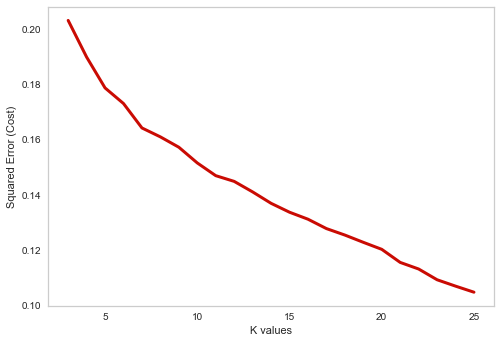

In [53]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
error_cost = []

# run k-means clustering
for i in range(3,26):
    kmeans = KMeans(n_clusters=i, random_state=0)
    try:
        kmeans.fit(toronto_grouped_clustering)
    except ValueError:
        print("error on line ", i)
        
    #calculate squared error for the clustered points
    error_cost.append(kmeans.inertia_/100)

# plot the K values against the squared error cost
plt.plot(range(3,26), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

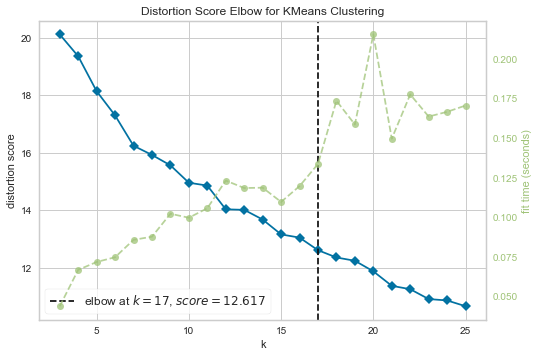

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(3,26))
visualizer.fit(toronto_grouped_clustering)
visualizer.show()

In [55]:
toronto_grouped_clustering
kclusters = 17

# run k-means clustering
torkmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
torkmeans.labels_[0:10] 

array([ 2,  3,  3, 10,  3,  2,  3,  2,  2,  2])

In [56]:
torkmeans.labels_

array([ 2,  3,  3, 10,  3,  2,  3,  2,  2,  2,  3,  3,  2,  2,  2,  3,  2,
        2,  3,  2,  3,  5,  3, 10, 10,  3,  2,  2,  2,  2,  2,  3,  3,  2,
        0,  0,  2, 10,  1,  3, 13,  2,  2,  2, 10, 16,  6,  2,  3,  3,  2,
       12,  3,  2,  2,  2, 15,  3,  3,  2,  4, 15, 15, 15,  3,  5,  2,  2,
        2,  3,  2,  2,  2,  5, 13,  2,  9,  9,  2,  6,  6,  2, 15,  2,  2,
        3, 15,  1,  3,  3, 16, 16, 16,  2,  3,  1,  1,  3, 10,  1,  2,  2,
        5, 15, 14,  5,  5,  1,  3,  3,  3, 13,  2,  1,  2,  2,  2, 10,  3,
        2,  5,  2, 15, 12,  2,  2,  2,  2,  2,  1,  1,  8,  3,  2,  2,  3,
        2, 10,  7,  7,  2,  2,  2,  2,  2,  5,  3,  3,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  2,  4,  2,  3,  2,  2, 10,  2,  8, 11,  3,  2,
       10,  2, 10, 10,  2,  2,  2,  3,  3, 15,  3,  1,  1,  1,  2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [57]:
neighborhoods_venues_sorted

Neighborhood       1st Most Common Venue  \
0                           Adelaide                 Coffee Shop   
1                          Agincourt          Chinese Restaurant   
2                    Agincourt North                        Bank   
3                          Alderwood                 Pizza Place   
4                     Bathurst Manor           Korean Restaurant   
5                      Bathurst Quay                 Coffee Shop   
6                    Bayview Village                        Bank   
7                       Bedford Park  Construction & Landscaping   
8                        Berczy Park                 Coffee Shop   
9                        Birch Cliff                Skating Rink   
10                 Bloordale Gardens           Convenience Store   
11   Broadview North (Old East York)              Ice Cream Shop   
12                          Brockton                         Bar   
13                          CN Tower                       Hotel   
14                       Cabbagetown                 Coffee Shop   
15                         Cedarbrae        Fast Food Restaurant   
16                Central Bay Street                 Coffee Shop   
17                         Chinatown                        Café   
18                          Christie           Korean Restaurant   
19              Church and Wellesley            Sushi Restaurant   
20                          Clairlea              Ice Cream Shop   
21                    Clarks Corners                        Park   
22                        Cliffcrest              Ice Cream Shop   
23                         Cliffside                 Pizza Place   
24                    Cliffside West                 Pizza Place   
25                        Cloverdale        Fast Food Restaurant   
26                    Commerce Court                 Coffee Shop   
27                        Davisville            Sushi Restaurant   
28                  Davisville North            Sushi Restaurant   
29                         Deer Park                 Coffee Shop   
30                   Design Exchange                 Coffee Shop   
31                         Don Mills              Clothing Store   
32                       Dorset Park          Chinese Restaurant   
33                Dovercourt Village                        Café   
34                         Downsview                 Coffee Shop   
35                   Downsview North                 Coffee Shop   
36                          Dufferin                         Bar   
37              East Birchmount Park               Grocery Store   
38                      East Toronto                  Food Court   
39                             Emery        Fast Food Restaurant   
40                          Eringate                        Park   
41                  Exhibition Place              Soccer Stadium   
42                          Fairview                 Coffee Shop   
43              First Canadian Place                 Coffee Shop   
44          Forest Hill North & West                 Pizza Place   
45             Forest Hill Road Park                Skating Rink   
46                    Forest Hill SE                  Playground   
47                   Garden District              Clothing Store   
48                         Glencairn                  Playground   
49                       Golden Mile              Clothing Store   
50                       Grange Park                 Coffee Shop   
51                         Guildwood               Train Station   
52                           Harbord           Korean Restaurant   
53                      Harbourfront                 Coffee Shop   
54                 Harbourfront East                 Coffee Shop   
55                 Harbourfront West                 Coffee Shop   
56                        Henry Farm                        Park   
57                         High Park                   Pet Store   
58          

In [58]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', torkmeans.labels_)

In [59]:
neighborhoods_venues_sorted

Cluster Labels                     Neighborhood  \
0                 2                         Adelaide   
1                 3                        Agincourt   
2                 3                  Agincourt North   
3                10                        Alderwood   
4                 3                   Bathurst Manor   
5                 2                    Bathurst Quay   
6                 3                  Bayview Village   
7                 2                     Bedford Park   
8                 2                      Berczy Park   
9                 2                      Birch Cliff   
10                3                Bloordale Gardens   
11                3  Broadview North (Old East York)   
12                2                         Brockton   
13                2                         CN Tower   
14                2                      Cabbagetown   
15                3                        Cedarbrae   
16                2               Central Bay Street   
17                2                        Chinatown   
18                3                         Christie   
19                2             Church and Wellesley   
20                3                         Clairlea   
21                5                   Clarks Corners   
22                3                       Cliffcrest   
23               10                        Cliffside   
24               10                   Cliffside West   
25                3                       Cloverdale   
26                2                   Commerce Court   
27                2                       Davisville   
28                2                 Davisville North   
29                2                        Deer Park   
30                2                  Design Exchange   
31                3                        Don Mills   
32                3                      Dorset Park   
33                2               Dovercourt Village   
34                0                        Downsview   
35                0                  Downsview North   
36                2                         Dufferin   
37               10             East Birchmount Park   
38                1                     East Toronto   
39                3                            Emery   
40               13                         Eringate   
41                2                 Exhibition Place   
42                2                         Fairview   
43                2             First Canadian Place   
44               10         Forest Hill North & West   
45               16            Forest Hill Road Park   
46                6                   Forest Hill SE   
47                2                  Garden District   
48                3                        Glencairn   
49                3                      Golden Mile   
50                2                      Grange Park   
51               12                        Guildwood   
52                3                          Harbord   
53                2                     Harbourfront   
54                2                Harbourfront East   
55                2                Harbourfront West   
56               15                       Henry Farm   
57                3                        High Park   
58                3                   Highland Creek   
59                2                Hillcrest Village   
60                4                       Humber Bay   
61               15                    Humber Summit   
62               15            Humber Valley Village   
63               15                        Humberlea   
64                3               Humewood-Cedarvale   
65                5                          Ionview   
66                2                        Islington   
67                2                 Islington Avenue   
68                2                        Jamestown   
69                3                     Kennedy Park   
70                2          

In [60]:
toronto_merged = df_Canada

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged # check the last columns!

Postal Code           Borough                    Neighbourhood   Latitude  \
0           M3A        North York                        Parkwoods  43.761124   
1           M4A        North York                 Victoria Village  43.732658   
2           M5A  Downtown Toronto                      Regent Park  43.660706   
3           M5A  Downtown Toronto                     Harbourfront  43.640080   
4           M6A        North York                   Lawrence Manor  43.722079   
5           M6A        North York                 Lawrence Heights  43.722778   
6           M7A  Downtown Toronto                     Queen's Park  43.659659   
7           M9A         Etobicoke                 Islington Avenue  43.621482   
8           M9A         Etobicoke            Humber Valley Village  43.666472   
9           M1B       Scarborough                          Malvern  43.809196   
10          M1B       Scarborough                            Rouge  43.804930   
11          M3B        North York                        Don Mills  43.775347   
12          M4B         East York                 Woodbine Gardens  43.712078   
13          M5B  Downtown Toronto                  Garden District  43.656500   
14          M5B  Downtown Toronto                          Ryerson  43.658469   
15          M6B        North York                        Glencairn  43.708712   
16          M9B         Etobicoke                  West Deane Park  43.663199   
17          M9B         Etobicoke                 Princess Gardens  43.640466   
18          M9B         Etobicoke                        Islington  43.645335   
19          M9B         Etobicoke                       Cloverdale  43.633637   
20          M1C       Scarborough                       Rouge Hill  43.780271   
21          M1C       Scarborough                       Port Union  43.775504   
22          M1C       Scarborough                   Highland Creek  43.790117   
23          M3C        North York                        Don Mills  43.775347   
24          M4C         East York                 Woodbine Heights  43.699920   
25          M5C  Downtown Toronto                   St. James Town  43.669403   
26          M6C              York               Humewood-Cedarvale  43.688322   
27          M9C         Etobicoke                         Eringate  43.662273   
28          M9C         Etobicoke                Bloordale Gardens  43.635317   
29          M9C         Etobicoke                Old Burnhamthorpe  43.639373   
30          M1E       Scarborough                        Guildwood  43.755225   
31          M1E       Scarborough                      Morningside  43.782601   
32          M1E       Scarborough                        West Hill  43.768914   
33          M4E      East Toronto                      The Beaches  43.671024   
34          M5E  Downtown Toronto                      Berczy Park  43.647984   
35          M1G       Scarborough                           Woburn  43.759824   
36          M4G         East York                          Leaside  43.704798   
37          M5G  Downtown Toronto               Central Bay Street  43.655644   
38          M6G  Downtown Toronto                         Christie  43.664111   
39          M1H       Scarborough                        Cedarbrae  43.756467   
40          M2H        North York                Hillcrest Village  43.681695   
41          M3H        North York                   Bathurst Manor  43.665519   
42          M3H        North York                   Wilson Heights  43.740519   
43          M3H        North York                  Downsview North  43.749299   
44          M4H         East York                 Thorncliffe Park  43.704553   
45          M5H  Downtown Toronto                         Richmond  43.652744   
46          M5H  Downtown Toronto                         Adelaide  43.650298   
47          M5H  Downtown Toronto                             King  43.648949   
48          M6H      West Toronto  

Finally, let's visualize the resulting clusters


In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

print(rainbow)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#6032fe', '#4062fa', '#208ef4', '#00b5eb', '#20d5e1', '#40ecd4', '#60fac5', '#80ffb4', '#a0faa1', '#c0eb8d', '#e0d377', '#ffb360', '#ff8c49', '#ff5f30', '#ff2f18', '#ff0000']


<a id='item5'></a>


In [62]:
toronto_merged.shape

(194, 18)

## 4. Examine Clusters


Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.


#### Cluster 1 - Downsview on the go coffee and french


In [72]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code     Borough    Neighbourhood  \
43          M3H  North York  Downsview North   
67          M3K  North York        Downsview   
80          M3L  North York        Downsview   
93          M3M  North York        Downsview   
104         M3N  North York        Downsview   

                                       Address  \
43   Downsview North, Toronto City, ON, Canada   
67         Downsview, Toronto City, ON, Canada   
80         Downsview, Toronto City, ON, Canada   
93         Downsview, Toronto City, ON, Canada   
104        Downsview, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
43   (Sheppard West, Sheppard West Bus Terminal, Yo...               0   
67   (Sheppard West, Sheppard West Bus Terminal, Yo...               0   
80   (Sheppard West, Sheppard West Bus Terminal, Yo...               0   
93   (Sheppard West, Sheppard West Bus Terminal, Yo...               0   
104  (Sheppard West, Sheppard West Bus Terminal, Yo...               0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
43            Coffee Shop           Bus Station     French Restaurant   
67            Coffee Shop           Bus Station     French Restaurant   
80            Coffee Shop           Bus Station     French Restaurant   
93            Coffee Shop           Bus Station     French Restaurant   
104           Coffee Shop           Bus Station     French Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
43          Metro Station  Gym / Fitness Center              Gym Pool   
67          Metro Station  Gym / Fitness Center              Gym Pool   
80          Metro Station  Gym / Fitness Center              Gym Pool   
93          Metro Station  Gym / Fitness Center              Gym Pool   
104         Metro Station  Gym / Fitness Center              Gym Pool   

      7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
43   Furniture / Home Store  Outdoor Supply Store           Gas Station   
67   Furniture / Home Store  Outdoor Supply Store           Gas Station   
80   Furniture / Home Store  Outdoor Supply Store           Gas Station   
93   Furniture / Home Store  Outdoor Supply Store           Gas Station   
104  Furniture / Home Store  Outdoor Supply Store           Gas Station   

    10th Most Common Venue  
43             Escape Room  
67             Escape Room  
80             Escape Room  
93             Escape Room  
104            Escape Room

#### Cluster 2 - Coffee and sandwiches


In [73]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code           Borough             Neighbourhood  \
6           M7A  Downtown Toronto              Queen's Park   
31          M1E       Scarborough               Morningside   
50          M1J       Scarborough       Scarborough Village   
53          M2J        North York                    Oriole   
55          M3J        North York           York University   
56          M4J         East York              East Toronto   
78          M2L        North York                York Mills   
84          M6L        North York                North Park   
90          M1M       Scarborough  Scarborough Village West   
97          M6M              York              Mount Dennis   
113         M2P        North York           York Mills West   
132         M9R         Etobicoke      Martin Grove Gardens   

                                               Address  \
6               Queen's Park, Toronto City, ON, Canada   
31               Morningside, Toronto City, ON, Canada   
50       Scarborough Village, Toronto City, ON, Canada   
53                    Oriole, Toronto City, ON, Canada   
55           York University, Toronto City, ON, Canada   
56              East Toronto, Toronto City, ON, Canada   
78                York Mills, Toronto City, ON, Canada   
84                North Park, Toronto City, ON, Canada   
90   Scarborough Village West, Toronto City, ON, Ca...   
97              Mount Dennis, Toronto City, ON, Canada   
113          York Mills West, Toronto City, ON, Canada   
132     Martin Grove Gardens, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
6    (Queen's Park, University Avenue, Discovery Di...               1   
31   (Morningside, Scarborough—Guildwood, Scarborou...               1   
50   (Scarborough Village, Scarborough—Guildwood, S...               1   
53   (Oriole, Highway 401 Collectors, Silver Hills,...               1   
55   (York University, 120, Ian Macdonald Boulevard...               1   
56   (E Wing, Life Saving Drive, Don Valley West, N...               1   
78   (York Mills, Wilson Avenue, St. John, Don Vall...               1   
84   (North Park, York South—Weston, North York, To...               1   
90   (Scarborough Village, Scarborough—Guildwood, S...               1   
97   (Mount Dennis, York South—Weston, York, Toront...               1   
113  (York Mills, Wilson Avenue, St. John, Don Vall...               1   
132  (Martin Grove Gardens, Etobicoke Centre, Etobi...               1   

      1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
6               Coffee Shop                  Café        Sandwich Place   
31              Coffee Shop                  Park        Discount Store   
50              Coffee Shop                   Gym              Pharmacy   
53   Furniture / Home Store           Coffee Shop        Ice Cream Shop   
55              Coffee Shop                  Café    Mexican Restaurant   
56               Food Court    Falafel Restaurant             Juice Bar   
78              Coffee Shop            Restaurant                   Pub   
84        Convenience Store   American Restaurant           Coffee Shop   
90              Coffee Shop                   Gym              Pharmacy   
97   Furniture / Home Store           Coffee Shop         Grocery Store   
113             Coffee Shop            Restaurant                   Pub   
132                Pharmacy          Liquor Store   American Restaurant   

         4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
6           Italian Restaurant     French Restaurant            Restaurant   
31              Sandwich Place              Pharmacy     Mobile Phone Shop   
50          Chinese Restaurant                   Pub  Fast Food Restaurant   
53               Train Station     Food & Drink Shop          Intersection   
55          Italian Restaurant      Greek Restaurant            Restaurant   
56                 Cof

#### Cluster 3 - Coffee, clothes, Japanese food


In [74]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code           Borough             Neighbourhood  \
2           M5A  Downtown Toronto               Regent Park   
3           M5A  Downtown Toronto              Harbourfront   
5           M6A        North York          Lawrence Heights   
7           M9A         Etobicoke          Islington Avenue   
13          M5B  Downtown Toronto           Garden District   
14          M5B  Downtown Toronto                   Ryerson   
17          M9B         Etobicoke          Princess Gardens   
18          M9B         Etobicoke                 Islington   
25          M5C  Downtown Toronto            St. James Town   
33          M4E      East Toronto               The Beaches   
34          M5E  Downtown Toronto               Berczy Park   
37          M5G  Downtown Toronto        Central Bay Street   
40          M2H        North York         Hillcrest Village   
45          M5H  Downtown Toronto                  Richmond   
46          M5H  Downtown Toronto                  Adelaide   
47          M5H  Downtown Toronto                      King   
48          M6H      West Toronto                  Dufferin   
49          M6H      West Toronto        Dovercourt Village   
51          M2J        North York                  Fairview   
58          M5J  Downtown Toronto         Harbourfront East   
59          M5J  Downtown Toronto             Union Station   
61          M6J      West Toronto           Little Portugal   
62          M6J      West Toronto                   Trinity   
68          M4K      East Toronto         The Danforth West   
70          M5K  Downtown Toronto   Toronto Dominion Centre   
71          M5K  Downtown Toronto           Design Exchange   
72          M6K      West Toronto                  Brockton   
74          M6K      West Toronto          Exhibition Place   
81          M4L      East Toronto          The Beaches West   
82          M5L  Downtown Toronto            Commerce Court   
83          M5L  Downtown Toronto            Victoria Hotel   
91          M2M        North York                Willowdale   
94          M4M      East Toronto           Studio District   
95          M5M        North York              Bedford Park   
100         M1N       Scarborough               Birch Cliff   
102         M2N        North York                Willowdale   
103         M2N        North York           Willowdale East   
105         M4N   Central Toronto             Lawrence Park   
106         M5N   Central Toronto                  Roselawn   
107         M6N              York                 Runnymede   
108         M6N              York        The Junction North   
109         M9N              York                    Weston   
112         M1P       Scarborough   Scarborough Town Centre   
114         M4P   Central Toronto          Davisville North   
118         M6P      West Toronto        The Junction South   
122         M2R        North York                Willowdale   
123         M2R        North York           Willowdale West   
124         M4R   Central Toronto        North Toronto West   
125         M4R   Central Toronto             Lawrence Park   
127         M5R   Central Toronto                 Yorkville   
129         M6R      West Toronto              Roncesvalles   
135         M4S   Central Toronto                Davisville   
136         M5S  Downtown Toronto     University of Toronto   
138         M6S      West Toronto                 Runnymede   
142         M1T       Scarborough                  Sullivan   
144         M4T   Central Toronto           Summerhill East   
145         M5T  Downtown Toronto         Kensington Market   
146         M5T  Downtown Toronto                 Chinatown   
147         M5T  Downtown Toronto               Grange Park   
152         M4V   Central Toronto           Summerhill West   
153         M4V   Central Toronto                 Rathnelly   
154         M4V   Central Toronto                South Hill   
156         M4V   Central Toronto  

#### Cluster 4 - Pizza, fast food, and Asian food


In [75]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code           Borough                    Neighbourhood  \
0           M3A        North York                        Parkwoods   
9           M1B       Scarborough                          Malvern   
11          M3B        North York                        Don Mills   
15          M6B        North York                        Glencairn   
19          M9B         Etobicoke                       Cloverdale   
22          M1C       Scarborough                   Highland Creek   
23          M3C        North York                        Don Mills   
24          M4C         East York                 Woodbine Heights   
26          M6C              York               Humewood-Cedarvale   
28          M9C         Etobicoke                Bloordale Gardens   
32          M1E       Scarborough                        West Hill   
35          M1G       Scarborough                           Woburn   
38          M6G  Downtown Toronto                         Christie   
39          M1H       Scarborough                        Cedarbrae   
41          M3H        North York                   Bathurst Manor   
42          M3H        North York                   Wilson Heights   
44          M4H         East York                 Thorncliffe Park   
57          M4J         East York  Broadview North (Old East York)   
63          M1K       Scarborough                     Kennedy Park   
66          M2K        North York                  Bayview Village   
69          M4K      East Toronto                        Riverdale   
73          M6K      West Toronto                 Parkdale Village   
75          M1L       Scarborough                      Golden Mile   
76          M1L       Scarborough                         Clairlea   
89          M1M       Scarborough                       Cliffcrest   
99          M9M        North York                            Emery   
110         M1P       Scarborough                      Dorset Park   
117         M6P      West Toronto                        High Park   
121         M1R       Scarborough                         Maryvale   
126         M5R   Central Toronto                        The Annex   
128         M6R      West Toronto                         Parkdale   
134         M1S       Scarborough                        Agincourt   
137         M5S  Downtown Toronto                          Harbord   
141         M1T       Scarborough                    Tam O'Shanter   
143         M4T   Central Toronto                       Moore Park   
148         M1V       Scarborough                         Milliken   
149         M1V       Scarborough                  Agincourt North   
162         M8V         Etobicoke                      New Toronto   
164         M9V         Etobicoke                    South Steeles   
165         M9V         Etobicoke                      Silverstone   
167         M9V         Etobicoke                      Thistletown   
178         M5X  Downtown Toronto                 Underground city   

                                               Address  \
0                  Parkwoods, Toronto City, ON, Canada   
9                    Malvern, Toronto City, ON, Canada   
11                 Don Mills, Toronto City, ON, Canada   
15                 Glencairn, Toronto City, ON, Canada   
19                Cloverdale, Toronto City, ON, Canada   
22            Highland Creek, Toronto City, ON, Canada   
23                 Don Mills, Toronto City, ON, Canada   
24          Woodbine Heights, Toronto City, ON, Canada   
26        Humewood-Cedarvale, Toronto City, ON, Canada   
28         Bloordale Gardens, Toronto City, ON, Canada   
32                 West Hill, Toronto City, ON, Canada   
35                    Woburn, Toronto City, ON, Canada   
38                  Christie, Toronto City, ON, Canada   
39                 Cedarbrae, Toronto City, ON, Canada   
41            Bathurst Manor, Toronto City, ON, Canada   
42            Wilson Heights, Toronto City, ON, Canada   
44     

#### Cluster 5 - Marina neighborhoods


In [76]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code           Borough    Neighbourhood  \
60          M5J  Downtown Toronto  Toronto Islands   
186         M8Y         Etobicoke       Humber Bay   

                                       Address  \
60   Toronto Islands, Toronto City, ON, Canada   
186       Humber Bay, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
60   (Toronto Islands, Old Toronto, Toronto, Golden...               4   
186  (Humber Bay, Etobicoke—Lakeshore, Etobicoke, T...               4   

          1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
60                  Music Venue       Harbor / Marina                  Café   
186  Construction & Landscaping       Harbor / Marina                  Park   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
60                   Park    Falafel Restaurant     Electronics Store   
186        Farmers Market     Electronics Store           Escape Room   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
60            Escape Room  Ethiopian Restaurant           Event Space   
186  Ethiopian Restaurant           Event Space               Factory   

    10th Most Common Venue  
60                 Factory  
186     Falafel Restaurant

#### Cluster 6 - Parks, women's stores, spas, and Ethiopian restaurants

In [77]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code           Borough     Neighbourhood  \
54          M3J        North York    Northwood Park   
64          M1K       Scarborough           Ionview   
139         M6S      West Toronto           Swansea   
140         M1T       Scarborough    Clarks Corners   
170         M4W  Downtown Toronto          Rosedale   
181         M8X         Etobicoke    Old Mill North   
183         M8Y         Etobicoke    Old Mill South   
184         M8Y         Etobicoke  King's Mill Park   

                                        Address  \
54     Northwood Park, Toronto City, ON, Canada   
64            Ionview, Toronto City, ON, Canada   
139           Swansea, Toronto City, ON, Canada   
140    Clarks Corners, Toronto City, ON, Canada   
170          Rosedale, Toronto City, ON, Canada   
181    Old Mill North, Toronto City, ON, Canada   
183    Old Mill South, Toronto City, ON, Canada   
184  King's Mill Park, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
54   (Northwood Park, Humber River—Black Creek, Nor...               5   
64   (Ionview, Scarborough Centre, Scarborough, Tor...               5   
139  (Swansea, Parkdale—High Park, Old Toronto, Tor...               5   
140  (Clarks Corners, Scarborough—Agincourt, Scarbo...               5   
170  (Rosedale, University—Rosedale, Old Toronto, T...               5   
181  (Old Mill, Bloor Street West, Old Mill, Etobic...               5   
183  (Old Mill, Bloor Street West, Old Mill, Etobic...               5   
184  (King's Mill Park, 9, Etobicoke—Lakeshore, Eto...               5   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
54                   Park        Baseball Field         Women's Store   
64                   Park         Metro Station         Deli / Bodega   
139                  Park          Dance Studio          Skating Rink   
140                  Park           Gas Station  Caribbean Restaurant   
170                  Park            Playground            Bike Trail   
181                  Park         Metro Station   American Restaurant   
183                  Park         Metro Station   American Restaurant   
184                  Park         Metro Station   American Restaurant   

    4th Most Common Venue        5th Most Common Venue 6th Most Common Venue  \
54         Farmers Market            Electronics Store           Escape Room   
64          Women's Store                  Escape Room  Ethiopian Restaurant   
139         Women's Store               Farmers Market     Electronics Store   
140         Women's Store  Eastern European Restaurant     Electronics Store   
170        Farmers Market  Eastern European Restaurant     Electronics Store   
181           Event Space                        River                   Spa   
183           Event Space                        River                   Spa   
184                 River                  Event Space                   Spa   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
54   Ethiopian Restaurant           Event Space               Factory   
64            Event Space               Factory    Falafel Restaurant   
139           Escape Room  Ethiopian Restaurant           Event Space   
140           Escape Room  Ethiopian Restaurant           Event Space   
170           Escape Room  Ethiopian Restaurant           Event Space   
181          Dance Studio         Deli / Bodega           Escape Room   
183          Dance Studio         Deli / Bodega           Escape Room   
184            Playground          Home Service              Hospital   

    10th Most Common Venue  
54      Falafel Restaurant  
64          Farmers Market  
139                Factory  
140                Factory  
170                Factory  
181   Ethiopian Restaurant  
183   Ethiopian Restaurant  
184       Doner Restaurant

#### Cluster 7 - Eastern European food, electronics, banking, and doctors

In [78]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code          Borough        Neighbourhood  \
4           M6A       North York       Lawrence Manor   
96          M5M       North York  Lawrence Manor East   
155         M4V  Central Toronto       Forest Hill SE   

                                           Address  \
4         Lawrence Manor, Toronto City, ON, Canada   
96   Lawrence Manor East, Toronto City, ON, Canada   
155       Forest Hill SE, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
4    (Lawrence Manor, Eglinton—Lawrence, North York...               6   
96   (Lawrence Manor, Eglinton—Lawrence, North York...               6   
155  (Forest Hill, Toronto—St. Paul's, Old Toronto,...               6   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
4       Electronics Store                  Bank       Doctor's Office   
96      Electronics Store                  Bank       Doctor's Office   
155            Playground                  Bank          Home Service   

    4th Most Common Venue 5th Most Common Venue        6th Most Common Venue  \
4              Kids Store                  Park  Eastern European Restaurant   
96             Kids Store                  Park  Eastern European Restaurant   
155                  Park    Falafel Restaurant  Eastern European Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
4             Escape Room  Ethiopian Restaurant           Event Space   
96            Escape Room  Ethiopian Restaurant           Event Space   
155     Electronics Store           Escape Room  Ethiopian Restaurant   

    10th Most Common Venue  
4                  Factory  
96                 Factory  
155            Event Space

#### Cluster 8 - Steeles playgrounds, fountains, and Eastern European food

In [88]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code      Borough Neighbourhood  \
150         M1V  Scarborough  Steeles East   
168         M1W  Scarborough  Steeles West   

                                    Address  \
150  Steeles East, Toronto City, ON, Canada   
168  Steeles West, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
150  (Steeles, Scarborough—Agincourt, Scarborough, ...               7   
168  (Steeles, Scarborough—Agincourt, Scarborough, ...               7   

    1st Most Common Venue 2nd Most Common Venue        3rd Most Common Venue  \
150            Playground              Fountain  Eastern European Restaurant   
168            Playground              Fountain  Eastern European Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
150     Electronics Store           Escape Room  Ethiopian Restaurant   
168     Electronics Store           Escape Room  Ethiopian Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
150           Event Space               Factory    Falafel Restaurant   
168           Event Space               Factory    Falafel Restaurant   

    10th Most Common Venue  
150         Farmers Market  
168         Farmers Market

#### Cluster 9 - Middle Eastern food and Parks

In [87]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 8, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code     Borough     Neighbourhood  \
1          M4A  North York  Victoria Village   
79         M2L  North York      Silver Hills   

                                       Address  \
1   Victoria Village, Toronto City, ON, Canada   
79      Silver Hills, Toronto City, ON, Canada   

                                          Coordinates  Cluster Labels  \
1   (Victoria Village, Don Valley East, North York...               8   
79  (Silver Hills, Don Valley West, North York, To...               8   

        1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1   Middle Eastern Restaurant                  Park       Thai Restaurant   
79  Middle Eastern Restaurant                  Park          Tennis Court   

       4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1   Mediterranean Restaurant           Escape Room  Ethiopian Restaurant   
79         Electronics Store           Escape Room  Ethiopian Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1            Event Space               Factory    Falafel Restaurant   
79           Event Space               Factory    Falafel Restaurant   

   10th Most Common Venue  
1          Farmers Market  
79         Farmers Market

#### Cluster 10 - Chinese food and shopping

In [86]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 9, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code      Borough    Neighbourhood  \
151         M1V  Scarborough  L'Amoreaux East   
169         M1W  Scarborough  L'Amoreaux West   

                                       Address  \
151  L'Amoreaux East, Toronto City, ON, Canada   
169  L'Amoreaux West, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
151  (L'Amoreaux, Scarborough—Agincourt, Scarboroug...               9   
169  (L'Amoreaux, Scarborough—Agincourt, Scarboroug...               9   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
151    Chinese Restaurant         Shopping Mall    Athletics & Sports   
169    Chinese Restaurant         Shopping Mall    Athletics & Sports   

    4th Most Common Venue 5th Most Common Venue        6th Most Common Venue  \
151           Coffee Shop              Bus Stop  Eastern European Restaurant   
169           Coffee Shop              Bus Stop  Eastern European Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
151           Escape Room  Ethiopian Restaurant           Event Space   
169           Escape Room  Ethiopian Restaurant           Event Space   

    10th Most Common Venue  
151                Factory  
169                Factory

#### Cluster 11 - Pizza and groceries

In [85]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 10, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code          Borough             Neighbourhood  \
65          M1K      Scarborough      East Birchmount Park   
86          M6L       North York               Upwood Park   
88          M1M      Scarborough                 Cliffside   
92          M2M       North York               Newtonbrook   
101         M1N      Scarborough            Cliffside West   
111         M1P      Scarborough           Wexford Heights   
115         M5P  Central Toronto  Forest Hill North & West   
119         M9P        Etobicoke                 Westmount   
120         M1R      Scarborough                   Wexford   
131         M9R        Etobicoke              St. Phillips   
133         M9R        Etobicoke          Richview Gardens   
171         M8W        Etobicoke                 Alderwood   

                                               Address  \
65      East Birchmount Park, Toronto City, ON, Canada   
86               Upwood Park, Toronto City, ON, Canada   
88                 Cliffside, Toronto City, ON, Canada   
92               Newtonbrook, Toronto City, ON, Canada   
101           Cliffside West, Toronto City, ON, Canada   
111          Wexford Heights, Toronto City, ON, Canada   
115  Forest Hill North & West, Toronto City, ON, Ca...   
119                Westmount, Toronto City, ON, Canada   
120                  Wexford, Toronto City, ON, Canada   
131             St. Phillips, Toronto City, ON, Canada   
133         Richview Gardens, Toronto City, ON, Canada   
171                Alderwood, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
65   (Birchmount Park, Scarborough Southwest, Scarb...              10   
86   (Upwood Park, 298, Queen's Drive, York South—W...              10   
88   (Cliffside, Scarborough Southwest, Scarborough...              10   
92   (Newtonbrook, Willowdale, North York, Toronto,...              10   
101  (Cliffside, Scarborough Southwest, Scarborough...              10   
111  (Wexford Heights, Scarborough Centre, Scarboro...              10   
115  (Forest Hill, Eglinton Avenue West, Eglinton W...              10   
119  (Westmount, Etobicoke Centre, Etobicoke, Toron...              10   
120  (Wexford, Scarborough Centre, Scarborough, Tor...              10   
131  (St. Phillips, Etobicoke North, Etobicoke, Tor...              10   
133  (Richview Gardens, Etobicoke Centre, Etobicoke...              10   
171  (Alderwood, Etobicoke—Lakeshore, Etobicoke, To...              10   

         1st Most Common Venue 2nd Most Common Venue  \
65               Grocery Store          Intersection   
86          Mexican Restaurant           Pizza Place   
88                 Pizza Place                   Pub   
92   Middle Eastern Restaurant       Thai Restaurant   
101                Pizza Place                   Pub   
111  Middle Eastern Restaurant           Pizza Place   
115                Pizza Place        Ice Cream Shop   
119                       Park           Pizza Place   
120                Pizza Place          Burger Joint   
131                   Bus Line           Coffee Shop   
133               Home Service          Intersection   
171                Pizza Place                   Pub   

         3rd Most Common Venue  4th Most Common Venue  \
65                 Gas Station             Beer Store   
86           Convenience Store  Vietnamese Restaurant   
88              Breakfast Spot         Sandwich Place   
92           Korean Restaurant       Greek Restaurant   
101             Breakfast Spot         Sandwich Place   
111              Grocery Store               Pharmacy   
115              Grocery Store           Dance Studio   
119         Chinese Restaurant            Gas Station   
120  Middle Eastern Restaurant          Grocery Store   
131                 Restaurant          Grocery Store   
133                      Field      Electronics Store   
171             Sandwich Place                    Gym   

        

#### Cluster 12 - Cafes, women's stores, and fountains at West Deane Park

In [84]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 11, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code    Borough    Neighbourhood  \
16         M9B  Etobicoke  West Deane Park   

                                      Address  \
16  West Deane Park, Toronto City, ON, Canada   

                                          Coordinates  Cluster Labels  \
16  (West Deane Park, Etobicoke Centre, Etobicoke,...              11   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
16                  Café         Women's Store              Fountain   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
16     Electronics Store           Escape Room  Ethiopian Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
16           Event Space               Factory    Falafel Restaurant   

   10th Most Common Venue  
16         Farmers Market

#### Cluster 13 - Scarborough Women's stores by the train station

In [83]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 12, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code      Borough Neighbourhood  \
20         M1C  Scarborough    Rouge Hill   
30         M1E  Scarborough     Guildwood   

                                 Address  \
20  Rouge Hill, Toronto City, ON, Canada   
30   Guildwood, Toronto City, ON, Canada   

                                          Coordinates  Cluster Labels  \
20  (Rouge Hill, 6251, Lawrence Avenue East, West ...              12   
30  (Guildwood, Westlake Road, Guildwood Village, ...              12   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
20              Bus Line         Train Station         Women's Store   
30         Train Station        Baseball Field      Storage Facility   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
20     Electronics Store           Escape Room  Ethiopian Restaurant   
30         Women's Store        Farmers Market     Electronics Store   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
20           Event Space               Factory    Falafel Restaurant   
30           Escape Room  Ethiopian Restaurant           Event Space   

   10th Most Common Venue  
20         Farmers Market  
30                Factory

#### Cluster 14 - Dumplings, parks, and women's stores

In [82]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 13, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code      Borough      Neighbourhood  \
21          M1C  Scarborough         Port Union   
27          M9C    Etobicoke           Eringate   
130         M9R    Etobicoke  Kingsview Village   

                                         Address  \
21          Port Union, Toronto City, ON, Canada   
27            Eringate, Toronto City, ON, Canada   
130  Kingsview Village, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
21   (Port Union, Scarborough—Rouge Park, Scarborou...              13   
27   (Eringate, Etobicoke Centre, Etobicoke, Toront...              13   
130  (Kingsview Village, Etobicoke North, Etobicoke...              13   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
21                   Park         Women's Store   Dumpling Restaurant   
27                   Park         Women's Store   Dumpling Restaurant   
130                  Park         Women's Store   Dumpling Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
21      Electronics Store           Escape Room  Ethiopian Restaurant   
27      Electronics Store           Escape Room  Ethiopian Restaurant   
130     Electronics Store           Escape Room  Ethiopian Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
21            Event Space               Factory    Falafel Restaurant   
27            Event Space               Factory    Falafel Restaurant   
130           Event Space               Factory    Falafel Restaurant   

    10th Most Common Venue  
21          Farmers Market  
27          Farmers Market  
130         Farmers Market

#### Cluster 15 - Dog runs, parks, and flower shops at Old Burnhamthorpe

In [81]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 14, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code    Borough      Neighbourhood  \
29         M9C  Etobicoke  Old Burnhamthorpe   

                                        Address  \
29  Old Burnhamthorpe, Toronto City, ON, Canada   

                                          Coordinates  Cluster Labels  \
29  (Old Burnhamthorpe, Etobicoke Centre, Etobicok...              14   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
29               Dog Run                  Park           Flower Shop   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
29           Gas Station         Women's Store           Escape Room   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
29  Ethiopian Restaurant           Event Space               Factory   

   10th Most Common Venue  
29     Falafel Restaurant

#### Cluster 16 - Bakeries, convenience stores, and parks

In [80]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 15, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code      Borough          Neighbourhood  \
8          M9A    Etobicoke  Humber Valley Village   
10         M1B  Scarborough                  Rouge   
12         M4B    East York       Woodbine Gardens   
36         M4G    East York                Leaside   
52         M2J   North York             Henry Farm   
77         M1L  Scarborough               Oakridge   
85         M6L   North York        Maple Leaf Park   
87         M9L   North York          Humber Summit   
98         M9M   North York              Humberlea   

                                            Address  \
8   Humber Valley Village, Toronto City, ON, Canada   
10                  Rouge, Toronto City, ON, Canada   
12       Woodbine Gardens, Toronto City, ON, Canada   
36                Leaside, Toronto City, ON, Canada   
52             Henry Farm, Toronto City, ON, Canada   
77               Oakridge, Toronto City, ON, Canada   
85        Maple Leaf Park, Toronto City, ON, Canada   
87          Humber Summit, Toronto City, ON, Canada   
98              Humberlea, Toronto City, ON, Canada   

                                          Coordinates  Cluster Labels  \
8   (Humber Valley, Etobicoke Centre, Etobicoke, T...              15   
10  (Rouge, Scarborough—Rouge Park, Scarborough, T...              15   
12  (Woodbine Gardens, Beaches—East York, East Yor...              15   
36  (Leaside, Don Valley West, East York, Toronto,...              15   
52  (Henry Farm, Don Valley North, North York, Tor...              15   
77  (Oakridge, Scarborough Southwest, Scarborough,...              15   
85  (Maple Leaf Park, York South—Weston, North Yor...              15   
87  (Humber Summit, Humber River—Black Creek, Nort...              15   
98  (Humberlea, Humber River—Black Creek, North Yo...              15   

         1st Most Common Venue 2nd Most Common Venue   3rd Most Common Venue  \
8            Convenience Store                  Park                  Bakery   
10           Convenience Store  Fast Food Restaurant                    Park   
12                      Bakery                  Park      Italian Restaurant   
36              Sandwich Place   Japanese Restaurant                    Park   
52                        Park                Lawyer            Tennis Court   
77              Ice Cream Shop          Dessert Shop       Convenience Store   
85  Construction & Landscaping                  Park                  Bakery   
87                      Bakery                  Park  Furniture / Home Store   
98           Convenience Store                Bakery          Baseball Field   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
8               Bus Stop          Skating Rink           Fish Market   
10     Electronics Store           Escape Room  Ethiopian Restaurant   
12           Coffee Shop     Electronics Store           Escape Room   
36     Convenience Store      Cuban Restaurant  Fast Food Restaurant   
52          Intersection         Women's Store     Electronics Store   
77              Bus Stop            Restaurant                  Park   
85      Business Service           Escape Room  Ethiopian Restaurant   
87              Pharmacy         Women's Store     Electronics Store   
98           Gas Station         Women's Store  Fast Food Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
8      Fish & Chips Shop   Filipino Restaurant                 Field   
10           Event Space               Factory    Falafel Restaurant   
12  Ethiopian Restaurant           Event Space               Factory   
36     Electronics Store           Escape Room  Ethiopian Restaurant   
52           Escape Room  Ethiopian Restaurant           Event Space   
77     Fish & Chips Shop   Filipino Restaurant                 Field   
85           Event Space               Factory    Falafel Restaurant   
87           Escape Room  Ethiopian Restaurant           Event Space   
98  Ethiop

#### Cluster 17 - Events, skating, bakeries, and bars

In [79]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 16, toronto_merged.columns[[0] + [1] + [2] + list(range(5, toronto_merged.shape[1]))]]

Postal Code          Borough          Neighbourhood  \
116         M5P  Central Toronto  Forest Hill Road Park   
163         M8V        Etobicoke           Mimico South   
187         M8Y        Etobicoke              Mimico NE   
190         M8Z        Etobicoke              Mimico NW   

                                             Address  \
116  Forest Hill Road Park, Toronto City, ON, Canada   
163           Mimico South, Toronto City, ON, Canada   
187              Mimico NE, Toronto City, ON, Canada   
190              Mimico NW, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
116  (Forest Hill Road, Forest Hill, Toronto—St. Pa...              16   
163  (Mimico, Windsor Street, Mimico Village, Etobi...              16   
187  (Mimico, Windsor Street, Mimico Village, Etobi...              16   
190  (Mimico, Windsor Street, Mimico Village, Etobi...              16   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
116          Skating Rink  Gym / Fitness Center      Video Game Store   
163                Bakery                   Bar         Train Station   
187                Bakery                   Bar         Train Station   
190                Bakery                   Bar         Train Station   

           4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
116  Eastern European Restaurant     Electronics Store           Escape Room   
163                 Skating Rink         Women's Store        Farmers Market   
187                 Skating Rink         Women's Store        Farmers Market   
190                 Skating Rink         Women's Store        Farmers Market   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
116  Ethiopian Restaurant           Event Space               Factory   
163           Escape Room  Ethiopian Restaurant           Event Space   
187           Escape Room  Ethiopian Restaurant           Event Space   
190           Escape Room  Ethiopian Restaurant           Event Space   

    10th Most Common Venue  
116     Falafel Restaurant  
163                Factory  
187                Factory  
190                Factory